# **Problem Statement**

Traditional machine learning systems struggle with specific types of computational problems, such as simulating quantum systems or optimizing complex multivariable functions. This project explores the use of **quantum gradients** to enable hybrid quantum-classical machine learning models for solving such problems efficiently.

---


# **Objective**

To demonstrate the calculation of gradients in parameterized quantum circuits using **TensorFlow Quantum**, enabling optimization for variational quantum algorithms and hybrid quantum-classical learning systems. The goal is to bridge quantum computing and machine learning, paving the way for quantum-enhanced AI models.

---

# **Business and Research Impacts**

***Business Impacts***:
1. **Optimization Improvements**: Quantum gradients can revolutionize industries like finance, logistics, and healthcare, where optimization problems are common.
2. **Competitive Advantage**: Early adoption of quantum machine learning can lead to a significant edge in technology and analytics.

***Research Impacts***:
1. **Advancing Hybrid AI**: This project highlights how quantum and classical systems can collaborate, driving innovation in AI.
2. **Foundational Tools**: By improving techniques for quantum gradient computation, it aids in solving broader research problems in quantum simulation and variational algorithms.
3. **Future Applications**: Applications include drug discovery, materials science, and cryptographic advancements.

---

# **Procedure and Approach**

1. **Setup**:  
   - Install and configure TensorFlow Quantum and Cirq for building quantum circuits.  
   - Define parameterized quantum gates to create trainable quantum models.

2. **Quantum Circuit Design**:  
   - Construct circuits with qubits and parameterized gates, modeling problems where quantum phenomena are beneficial.

3. **Gradient Computation**:  
   - Use TensorFlow Quantum to calculate gradients of the quantum circuits with respect to parameters.  
   - Apply gradient-based optimization (e.g., stochastic gradient descent) for loss minimization.

4. **Hybrid Integration**:  
   - Combine quantum circuits with classical machine learning frameworks to solve optimization tasks.

5. **Analysis**:  
   - Visualize results, such as how the loss decreases during training or how gradients evolve with parameters.

---

# Calculating Gradients

Calculating the gradient of the expectation value of a specific observable in a quantum circuit is a sophisticated and nuanced process that requires careful consideration. Unlike traditional machine learning operations—such as matrix multiplication or vector addition—which come with well-defined, straightforward analytic gradient formulas, quantum circuits operate under a different set of mathematical and physical principles. These principles often render it challenging, if not impossible, to write down analytic gradient formulas in a simple and universally applicable way.

This inherent complexity arises from the quantum nature of the systems, where observables correspond to measurements on quantum states governed by the rules of quantum mechanics. As a result, determining the gradient of such expectation values involves navigating intricate relationships between quantum states, operators, and measurements. These challenges are further compounded when working with noisy environments or large-scale quantum systems.

To overcome these obstacles, researchers have developed various gradient calculation methods specifically designed for quantum scenarios. These methods differ in their underlying approaches, computational requirements, and suitability for specific types of quantum circuits or tasks. Each method is tailored to address particular challenges, such as circuit depth, hardware constraints, or the nature of the observable being measured.

In this tutorial, we explore two distinct differentiation schemes used to compute gradients in quantum circuits. By comparing and contrasting these methods, we aim to provide a comprehensive understanding of their theoretical foundations, practical implementation, and relative strengths. Whether you are designing quantum machine learning models or optimizing quantum algorithms, this analysis will serve as a valuable guide to selecting the most appropriate gradient calculation method for your specific needs.

# Set up

In [ ]:
! pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
! pip install tensorflow-quantum==0.7.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 92.6 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.12 which is incompatible.


In [ ]:
# Update package resources to account for version changes.
import importlib, pkg_resources
importlib.reload(pkg_resources)

<ipython-input-3-b07882b7b3a0>:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import importlib, pkg_resources


<module 'pkg_resources' from '/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py'>

In [ ]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

# Preliminary

Let's make the notion of gradient calculation for quantum circuits a little more concrete. Suppose you have a parameterized circuit like this one:

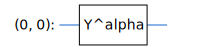

In [ ]:
qubit = cirq.GridQubit(0, 0)
my_circuit = cirq.Circuit(cirq.Y(qubit)**sympy.Symbol('alpha'))
SVGCircuit(my_circuit)

Along with an observable:

In [ ]:
pauli_x = cirq.X(qubit)
pauli_x

cirq.X(cirq.GridQubit(0, 0))

Looking at this operator you know that $⟨Y(\alpha)| X | Y(\alpha)⟩ = \sin(\pi \alpha)$

In [ ]:
def my_expectation(op, alpha):
    """Compute ⟨Y(alpha)| `op` | Y(alpha)⟩"""

    params = {'alpha': alpha}
    sim = cirq.Simulator()
    final_state_vector = sim.simulate(my_circuit, params).final_state_vector

    return op.expectation_from_state_vector(final_state_vector, {qubit: 0}).real

In [ ]:
my_alpha = 0.3
print("Expectation =", my_expectation(pauli_x, my_alpha))
print("Sin Formula =", np.sin(np.pi * my_alpha))

Expectation = 0.80901700258255
Sin Formula = 0.8090169943749475


 and if you define $f_{1}(\alpha) = ⟨Y(\alpha)| X | Y(\alpha)⟩$ then $f_{1}^{'}(\alpha) = \pi \cos(\pi \alpha)$. Let's check this:

In [ ]:
def my_grad(obs, alpha, eps=0.01):
    grad = 0

    f_x = my_expectation(obs, alpha)
    f_x_prime = my_expectation(obs, alpha + eps)

    return ((f_x_prime - f_x) / eps).real

In [ ]:
print('Finite difference:', my_grad(pauli_x, my_alpha))
print('Cosine formula:   ', np.pi * np.cos(np.pi * my_alpha))

Finite difference: 1.8063604831695557
Cosine formula:    1.8465818304904567


# The Need for a Differentiator

As quantum circuits scale in size and complexity, having a straightforward formula to calculate gradients becomes increasingly unlikely. While small or simple circuits may sometimes allow for precise gradient calculations using analytical methods, larger circuits often require more robust and flexible approaches to handle their intricacies. In such cases, relying on predefined formulas may not suffice, especially when dealing with complex quantum states and observables.

This is where the `tfq.differentiators.Differentiator` class in TensorFlow Quantum (TFQ) proves invaluable. It provides a powerful framework for defining custom algorithms to compute gradients of quantum circuits, tailored to specific requirements. This flexibility ensures that users can effectively address the unique challenges posed by large-scale quantum computations.

For instance, using the `tfq.differentiators.Differentiator` class, you can recreate and extend gradient calculation examples, such as those used in simpler contexts, and apply them to more complex scenarios within TensorFlow Quantum. Here's a practical implementation to demonstrate how this works, seamlessly integrating quantum and classical computation in your models.

In [ ]:
expectation_calculation = tfq.layers.Expectation(differentiator=tfq.differentiators.ForwardDifference(grid_spacing=0.01))

In [ ]:
expectation_calculation(my_circuit,
                        operators=pauli_x,
                        symbol_names=['alpha'],
                        symbol_values=[[my_alpha]])

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.80901706]], dtype=float32)>

However, if you switch to estimating expectation based on sampling (what would happen on a true device) the values can change a little bit. This means you now have an imperfect estimate:

In [ ]:
sampled_expectation_calculation = tfq.layers.SampledExpectation(differentiator=tfq.differentiators.ForwardDifference(grid_spacing=0.01))

In [ ]:
sampled_expectation_calculation(my_circuit,
                                operators=pauli_x,
                                repetitions=500,
                                symbol_names=['alpha'],
                                symbol_values=[[my_alpha]])

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.832]], dtype=float32)>

This can quickly compound into a serious accuracy problem when it comes to gradients:

In [ ]:
# Make input_points = [batch_size, 1] array.

input_points = np.linspace(0, 5, 200)[:, np.newaxis].astype(np.float32)

exact_outputs = expectation_calculation(my_circuit,
                                        operators=pauli_x,
                                        symbol_names=['alpha'],
                                        symbol_values=input_points)

imperfect_outputs = sampled_expectation_calculation(my_circuit,
                                                    operators=pauli_x,
                                                    repetitions=500,
                                                    symbol_names=['alpha'],
                                                    symbol_values=input_points)

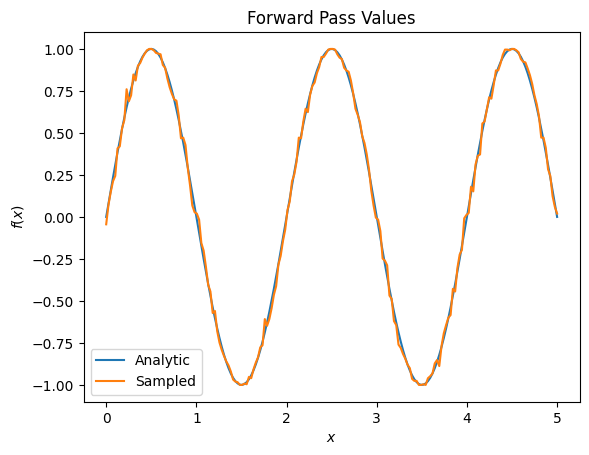

In [ ]:
plt.title('Forward Pass Values')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.plot(input_points, exact_outputs, label='Analytic')
plt.plot(input_points, imperfect_outputs, label='Sampled')
plt.legend()
plt.show()

## Gradients are a much different story

In [ ]:
values_tensor = tf.convert_to_tensor(input_points)

In [ ]:
with tf.GradientTape() as g:
    g.watch(values_tensor)
    exact_outputs = expectation_calculation(my_circuit,
                                            operators=pauli_x,
                                            symbol_names=['alpha'],
                                            symbol_values=values_tensor)

In [ ]:
analytic_finite_diff_gradients = g.gradient(exact_outputs, values_tensor)

In [ ]:
with tf.GradientTape() as g:
    g.watch(values_tensor)
    imperfect_outputs = sampled_expectation_calculation(my_circuit,
                                                        operators=pauli_x,
                                                        repetitions=500,
                                                        symbol_names=['alpha'],
                                                        symbol_values=values_tensor)

In [ ]:
sampled_finite_diff_gradients = g.gradient(imperfect_outputs, values_tensor)

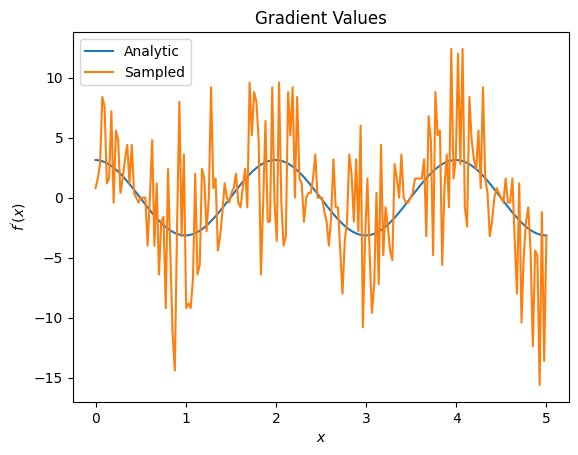

In [ ]:
plt.title('Gradient Values')
plt.xlabel('$x$')
plt.ylabel('$f^{\'}(x)$')
plt.plot(input_points, analytic_finite_diff_gradients, label='Analytic')
plt.plot(input_points, sampled_finite_diff_gradients, label='Sampled')
plt.legend()
plt.show()

In this example, while the finite difference formula demonstrates efficiency for computing gradients in analytical scenarios, its performance deteriorates significantly when applied to sampling-based methods. The primary challenge lies in the inherent noise introduced by sampling, which makes the gradients unreliable and prone to inaccuracies. This limitation highlights the need for more sophisticated techniques that can mitigate noise and ensure the gradients remain meaningful in practical, real-world quantum applications.

To address this issue, more deliberate and robust methods are required, even if they come at the cost of increased computational time. The next section explores a slower yet more reliable technique. While this method may not be ideal for analytical gradient calculations due to its computational overhead, it excels in handling sample-based scenarios where noise is a critical factor. By striking a balance between precision and practicality, this approach proves to be a valuable tool for real-world quantum gradient calculations, offering significant improvements in accuracy and consistency.

## A smarter differentiation scheme

In [ ]:
gradient_safe_sampled_expectation = tfq.layers.SampledExpectation(differentiator=tfq.differentiators.ParameterShift())

In [ ]:
with tf.GradientTape() as g:
    g.watch(values_tensor)
    imperfect_outputs = gradient_safe_sampled_expectation(my_circuit,
                                                          operators=pauli_x,
                                                          repetitions=500,
                                                          symbol_names=['alpha'],
                                                          symbol_values=values_tensor)

In [ ]:
sampled_param_shift_gradients = g.gradient(imperfect_outputs, values_tensor)

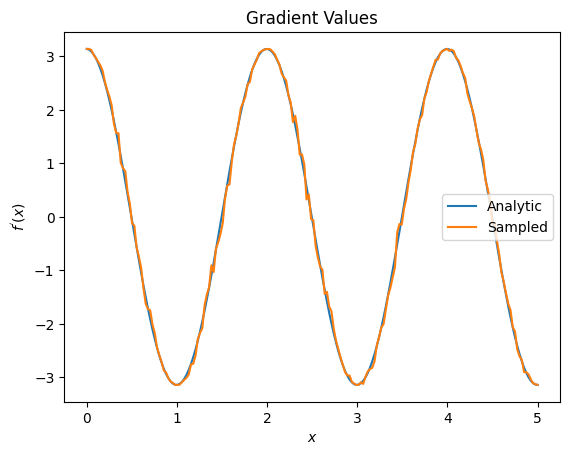

In [ ]:
plt.title('Gradient Values')
plt.xlabel('$x$')
plt.ylabel('$f^{\'}(x)$')
plt.plot(input_points, analytic_finite_diff_gradients, label='Analytic')
plt.plot(input_points, sampled_param_shift_gradients, label='Sampled')
plt.savefig('gradients.png')
plt.legend()
plt.show()

As demonstrated, the choice of differentiators depends heavily on the specific research scenario and its requirements. Slower, sample-based methods, which are designed to be robust against factors like device noise and variability, excel in testing or implementing algorithms within a more "real-world" context. These methods provide the stability and reliability needed when working with noisy quantum hardware, making them indispensable for practical, hardware-focused applications.

On the other hand, faster techniques like finite difference are well-suited for analytical calculations, where speed and throughput are prioritized. These methods are particularly valuable during the initial stages of research or development when the focus is on theory, simulation, or exploring new algorithms, without yet accounting for the constraints or imperfections of real quantum devices.

By understanding the strengths and limitations of each approach, researchers can select the most appropriate differentiator to align with their goals—whether it's optimizing for computational efficiency or ensuring robust performance under real-world conditions. This flexibility is key to advancing quantum algorithm development across different stages of research and application.

# Multiple Observables

Let's introduce a second observable and see how TensorFlow Quantum supports multiple observables for a single circuit.

In [ ]:
pauli_z = cirq.Z(qubit)
pauli_z

cirq.Z(cirq.GridQubit(0, 0))

If this observable is used with the same circuit as before, then you have $f_{2}(\alpha) = ⟨Y(\alpha)| Z | Y(\alpha)⟩ = \cos(\pi \alpha)$ and $f_{2}^{'}(\alpha) = -\pi \sin(\pi \alpha)$. Perform a quick check:

In [ ]:
test_value = 0.

print('Finite difference:', my_grad(pauli_z, test_value))
print('Sin formula:      ', -np.pi * np.sin(np.pi * test_value))

Finite difference: -0.04934072494506836
Sin formula:       -0.0


This demonstrates an important principle in quantum gradient calculations. If we define $ g(\alpha) = f_{1}(\alpha) + f_{2}(\alpha) $, then by the rules of calculus, $ g'(\alpha) = f_{1}'(\alpha) + f_{2}'(\alpha) $. Extending this idea, defining multiple observables in TensorFlow Quantum to associate with a circuit is analogous to adding more terms to $ g(\alpha) $.

In this context, the gradient of a particular symbol in a circuit becomes the sum of the gradients with respect to each observable for that symbol. This relationship aligns seamlessly with TensorFlow’s gradient computation and backpropagation frameworks, where the sum of all individual gradients over the observables is treated as the total gradient for a given symbol.

This compatibility ensures that quantum circuits integrated into TensorFlow Quantum can leverage the powerful gradient-based optimization techniques of classical machine learning. By summing gradients across observables, the framework provides a straightforward yet robust method to compute the total effect of all observables on the circuit's parameters, facilitating efficient and accurate training of quantum-enhanced models.

In [ ]:
sum_of_outputs = tfq.layers.Expectation(
    differentiator=tfq.differentiators.ForwardDifference(grid_spacing=0.01))

In [ ]:
sum_of_outputs(my_circuit,
               operators=[pauli_x, pauli_z],
               symbol_names=['alpha'],
               symbol_values=[[test_value]])

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1.9106855e-15, 1.0000000e+00]], dtype=float32)>

Here you see the first entry is the expectation w.r.t `Pauli X`, and the second is the expectation w.r.t `Pauli Z`. Now when you take the gradient:

In [ ]:
test_value_tensor = tf.convert_to_tensor([[test_value]])

In [ ]:
with tf.GradientTape() as g:
    g.watch(test_value_tensor)
    outputs = sum_of_outputs(my_circuit,
                             operators=[pauli_x, pauli_z],
                             symbol_names=['alpha'],
                             symbol_values=test_value_tensor)

In [ ]:
sum_of_gradients = g.gradient(outputs, test_value_tensor)

In [ ]:
print(my_grad(pauli_x, test_value) + my_grad(pauli_z, test_value))
print(sum_of_gradients.numpy())

3.0917350202798843
[[3.0917213]]


Here you have verified that the sum of the gradients for each observable is indeed the gradient of $\alpha$. This behavior is supported by all TensorFlow Quantum differentiators and plays a crucial role in the compatibility with the rest of TensorFlow.

# Advanced Usage

In TensorFlow Quantum, all differentiators derive from the base class `tfq.differentiators.Differentiator`. To create a custom differentiator, users need to implement one of two main interfaces. The standard approach is to override the `get_gradient_circuits` method, which specifies the quantum circuits that need to be measured to estimate the gradient. This method provides a straightforward way to define the behavior of the differentiator in terms of circuit measurement.

Alternatively, advanced users can choose to overload `differentiate_analytic` and `differentiate_sampled`, which allow for a more direct specification of how gradients should be computed for analytic and sampled scenarios, respectively. For example, the `tfq.differentiators.Adjoint` class employs this route, providing an efficient method for computing gradients analytically.

To illustrate this in practice, the following example demonstrates how to compute the gradient of a quantum circuit using TensorFlow Quantum. It employs the parameter-shift rule, a popular technique for gradient computation that is both conceptually simple and effective for many quantum circuits. By leveraging TensorFlow Quantum, this example highlights how users can define and utilize differentiators to optimize quantum circuits seamlessly within the TensorFlow ecosystem.

Recall the circuit you defined above, $|\alpha⟩ = Y^{\alpha}|0⟩$.  As before, you can define a function as the expectation value of this circuit against the $X$ observable, $f(\alpha) = ⟨\alpha|X|\alpha⟩$.  Using [parameter shift rules](https://pennylane.ai/qml/glossary/parameter_shift.html), for this circuit, you can find that the derivative is
$$\frac{\partial}{\partial \alpha} f(\alpha) = \frac{\pi}{2} f\left(\alpha + \frac{1}{2}\right) -  \frac{ \pi}{2} f\left(\alpha - \frac{1}{2}\right)$$
The `get_gradient_circuits` function returns the components of this derivative.

In [ ]:
class MyDifferentiator(tfq.differentiators.Differentiator):
    """A Toy differentiator for <Y^alpha | X |Y^alpha>."""

    def __init__(self):
        pass

    def get_gradient_circuits(self, programs, symbol_names, symbol_values):
        """Return circuits to compute gradients for given forward pass circuits.

        Every gradient on a quantum computer can be computed via measurements
        of transformed quantum circuits.  Here, you implement a custom gradient
        for a specific circuit.  For a real differentiator, you will need to
        implement this function in a more general way.  See the differentiator
        implementations in the TFQ library for examples.
        """

        # The two terms in the derivative are the same circuit...
        batch_programs = tf.stack([programs, programs], axis=1)

        # ... with shifted parameter values.
        shift = tf.constant(1/2)
        forward = symbol_values + shift
        backward = symbol_values - shift
        batch_symbol_values = tf.stack([forward, backward], axis=1)

        # Weights are the coefficients of the terms in the derivative.
        num_program_copies = tf.shape(batch_programs)[0]
        batch_weights = tf.tile(tf.constant([[[np.pi/2, -np.pi/2]]]),
                                [num_program_copies, 1, 1])

        # The index map simply says which weights go with which circuits.
        batch_mapper = tf.tile(
            tf.constant([[[0, 1]]]), [num_program_copies, 1, 1])

        return (batch_programs, symbol_names, batch_symbol_values,
                batch_weights, batch_mapper)

The `Differentiator` base class uses the components returned from `get_gradient_circuits` to calculate the derivative, as in the parameter shift formula you saw above.  This new differentiator can now be used with existing `tfq.layer` objects:

In [ ]:
custom_dif = MyDifferentiator()
custom_grad_expectation = tfq.layers.Expectation(differentiator=custom_dif)

In [ ]:
# Now let's get the gradients with finite diff.
with tf.GradientTape() as g:
    g.watch(values_tensor)
    exact_outputs = expectation_calculation(my_circuit,
                                            operators=[pauli_x],
                                            symbol_names=['alpha'],
                                            symbol_values=values_tensor)

analytic_finite_diff_gradients = g.gradient(exact_outputs, values_tensor)

In [ ]:
# Now let's get the gradients with custom diff.
with tf.GradientTape() as g:
    g.watch(values_tensor)
    my_outputs = custom_grad_expectation(my_circuit,
                                         operators=[pauli_x],
                                         symbol_names=['alpha'],
                                         symbol_values=values_tensor)

my_gradients = g.gradient(my_outputs, values_tensor)

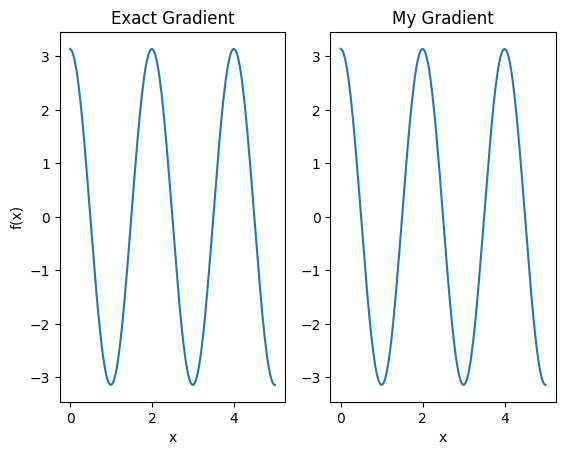

In [ ]:
plt.subplot(1, 2, 1)
plt.title('Exact Gradient')
plt.plot(input_points, analytic_finite_diff_gradients.numpy())
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.title('My Gradient')
plt.plot(input_points, my_gradients.numpy())
plt.xlabel('x')

plt.show()

With this newly defined differentiator, you can now create differentiable operations to integrate seamlessly into your workflow. TensorFlow Quantum allows these differentiable operations to leverage the gradient computation capabilities provided by the differentiator, enabling efficient optimization and model training.

**Key Point:** It is crucial to note that a differentiator can only be attached to one operation (op) at a time. If you intend to attach the same differentiator to a different operation, you must first refresh or reinitialize the differentiator. This ensures that it correctly aligns with the new operation and avoids potential conflicts or inconsistencies.

By adhering to this guideline, you can effectively manage differentiators across various operations, maintaining flexibility while ensuring the reliability of gradient computations.

In [ ]:
# Create a noisy sample based expectation op.
expectation_sampled = tfq.get_sampled_expectation_op(
    cirq.DensityMatrixSimulator(noise=cirq.depolarize(0.01)))

In [ ]:
# Make it differentiable with your differentiator:
# Remember to refresh the differentiator before attaching the new op
custom_dif.refresh()
differentiable_op = custom_dif.generate_differentiable_op(
    sampled_op=expectation_sampled)

In [ ]:
# Prep op inputs.
circuit_tensor = tfq.convert_to_tensor([my_circuit])
op_tensor = tfq.convert_to_tensor([[pauli_x]])
single_value = tf.convert_to_tensor([[my_alpha]])
num_samples_tensor = tf.convert_to_tensor([[5000]])

In [ ]:
with tf.GradientTape() as g:
    g.watch(single_value)
    forward_output = differentiable_op(circuit_tensor, ['alpha'], single_value,
                                       op_tensor, num_samples_tensor)

In [ ]:
my_gradients = g.gradient(forward_output, single_value)

In [ ]:
print('---TFQ---')
print('Foward:  ', forward_output.numpy())
print('Gradient:', my_gradients.numpy())
print('\n---Original---')
print('Forward: ', my_expectation(pauli_x, my_alpha))
print('Gradient:', my_grad(pauli_x, my_alpha))

---TFQ---
Foward:   [[0.8]]
Gradient: [[1.8045309]]

---Original---
Forward:  0.80901700258255
Gradient: 1.8063604831695557


# **Final Thoughts**

This project explored the intricacies of calculating gradients in quantum circuits, highlighting the challenges posed by the quantum nature of these systems and the need for specialized differentiation techniques. We delved into two primary differentiation schemes: finite difference and parameter-shift methods, comparing their strengths and weaknesses in the context of analytical and sample-based gradient estimations.

***Key Findings***

Finite difference, while efficient for analytical calculations, suffers from noise-induced inaccuracies in sample-based scenarios, emphasizing the need for more robust techniques when dealing with real-world quantum hardware.
Parameter-shift, although slower, exhibits superior noise resilience and reliability, making it essential for practical quantum applications where device imperfections and variability are prevalent.
TensorFlow Quantum's tfq.differentiators.Differentiator class offers a flexible framework for implementing custom gradient calculation algorithms, enabling users to address specific research scenarios effectively.
The sum of gradients across multiple observables for a particular symbol in a circuit is treated as the total gradient, maintaining consistency with TensorFlow's gradient computation framework and backpropagation.

***Significance***

The choice of differentiator hinges on the specific requirements of a research project. Slower, sample-based methods excel in testing and implementing real-world quantum algorithms where noise resilience is paramount, while faster techniques like finite difference are well-suited for analytical calculations during theoretical exploration or development phases.

***Further Research***

Future directions could involve investigating more advanced gradient calculation methods like the adjoint method, exploring noise mitigation techniques to improve the accuracy of sample-based estimations, and developing custom differentiators tailored to specific circuit structures or problem domains.

***Overall***

This project demonstrated the importance of a careful and nuanced approach to gradient calculation in quantum circuits. By leveraging TensorFlow Quantum and understanding the available differentiation schemes, researchers can effectively optimize their quantum algorithms and unlock the potential of quantum computation. As quantum hardware advances and the field progresses, refining these techniques will be crucial for building robust and practical quantum-enhanced solutions.

# **Conclusion**

The project successfully demonstrates the capability to calculate and use quantum gradients for optimizing parameterized quantum circuits. This serves as a proof of concept for the utility of TensorFlow Quantum in quantum machine learning tasks. The results indicate that hybrid quantum-classical systems can efficiently solve complex optimization problems and pave the way for more scalable and advanced quantum-enhanced models.

---

# **Future Improvements**

1. **Scalability**: Extend the approach to larger quantum circuits and datasets.  
2. **Error Mitigation**: Address issues caused by quantum noise in near-term quantum devices.  
3. **Diverse Applications**: Explore more complex hybrid quantum-classical use cases, such as natural language processing and reinforcement learning.  
4. **Integration with Other Frameworks**: Combine TensorFlow Quantum with other quantum tools like IBM Qiskit or AWS Braket for broader compatibility.  
5. **Real-World Testing**: Deploy hybrid models on real-world quantum devices to evaluate performance in practical scenarios.

---